## Time Series Analysis: Applying Transformations and Inverse Transformations in Linear Models, Interpreting Residuals, and Exploring the Cauchy Distribution


#### Installing necessary libraries 

**You can assume that numpy, matplotlib, scipy and pandas-datareader are installed on the machine of the
person who will run and mark your notebook. There is no need to force an install with the ! command. For
textual answers please use a markdown cell.**

In [407]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [408]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [409]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [410]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


<div style="border-top: 2px solid #888; margin-top: 10px;"></div>

### Analysis 1
**1. You will first download the world GDP data from the World Bank using pandas_datareader.
The following code will download and plot the entire world GDP time series. Do NOT make any local
copies of your data!**

#### Importing the necessary libraries

In [411]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress, norm, t

/opt/conda/lib/python3.10/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


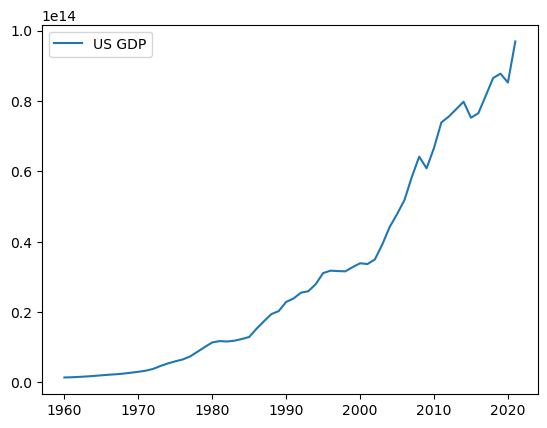

In [412]:
#Plotting world GDP Time series against Time
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country = 'WLD', start ='1960', end='2021')
time = np.arange(1960,2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
#Data is returned in inverse chronological order, so reverse order
gdp = np.flip(gdp)

#Plot world GDP data against time
plt.plot(time,gdp,label = 'US GDP')
plt.legend()
plt.show()

**(you can ignore the warning about the code ‘WLD’). You will try to estimate the long-term annual growth rate of the world using a regression.**

**(a) If the growth rate was a constant r, then the world’s GDP would grow as GDPk = GDP0(1 + r)k
where k is the number of years since 1960 and GDP0 is the world’s GDP in 1960. This is clearly not a linear relationship between time (k, in years) and GDP. However, we can get a linear relationship by applying a simple transformation f(−) on both side of the equation. What is this transformation?**

(Hint: we used this transformation in the context of MLE, it turns products into sums.)


**(b) Apply this transformation f(−) to the GDP data, and perform a regression against the time variable.
On the same plot, display your regression line, a scatter-plot of the (transformed) data points, and
your R2 value.**

### Answer:

**The transformation applied here to achieve a linear relationship between time (k) and GDP in the given context is the Natural Logarithm Transformation.**
#### Applying Transformation to GDP data

The transformation we use is by taking **log** at both sides. We can transform the relationship between time and GDP into a linear relationship by taking the logarithm of both sides of the equation. This transformation turns the multiplicative relationship into an additive one, which can be represented as a straight line in a linear regression model.

Transformed Equation is:-
$$
\log{GDP_{k}} = \log{GDP_{0}} + k \log{(1+r)}
$$


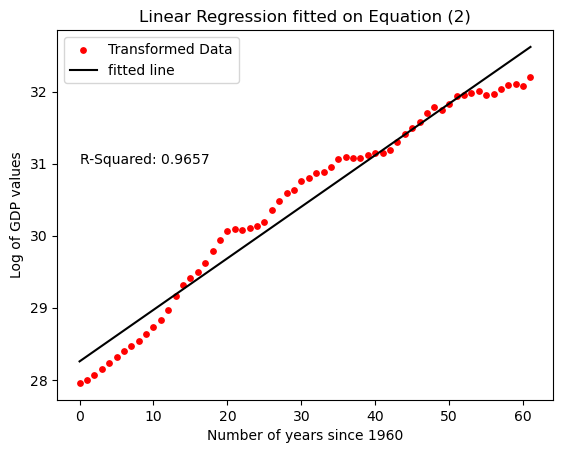

In [413]:
#k-> Number of years since 1960 (time[0] == 1960)
k = time -time[0]
#Linear regression performed to model relationship between log(GDPk) and k
linear_regression = stats.linregress(k, np.log(gdp))

#Keeping x-axis as difference of years (k) between a particular year and 1960 and y-axis as log of GDP values

#Transforming the data by taking log on GDP values
plt.scatter(k, np.log(gdp), label='Transformed Data', s=15,color='red')

#Obtaining predictions from the fitted regression model
    #k is the independent variable (number of years since 1960).
    #np.log(gdp) is the dependent variable (logarithm of GDP values).
    #linear_regression is an object containing the results of the linear regression, including the slope, intercept, R-squared value
prediction = linear_regression.intercept + linear_regression.slope*k

#Line represents linear relationship between log(GDP) and number of years since 1960
plt.plot(k, prediction, 'black', label='fitted line') 

#R squared value denotes how well the regression line fits the data
plt.text(0, 31, f"R-Squared: {linear_regression.rvalue**2 :.4f}")
plt.xlabel("Number of years since 1960")
plt.ylabel("Log of GDP values")
plt.title("Linear Regression fitted on Equation (2)")
plt.legend()
plt.show()

**(c) Compute the residuals of your regression (i.e. the difference between the model and the observations),
and print their mean and their standard deviation σˆ. Perform a KS-test to determine whether we
can reject the null hypothesis that the residuals are sampled from a normal distribution with mean
0 and standard deviation σˆ. Take α = 99%.**

### Answer:

In [414]:
residuals = prediction - np.log(gdp)
print(f"Mean of the residuals: {np.mean(residuals) :.4f}")
print(f"Standard Deviation of residuals: {np.std(residuals) :.4f}")

Mean of the residuals: 0.0000
Standard Deviation of residuals: 0.2414


#### <u>Interpretation:-</u>
A mean close to zero suggests that, on average, the linear regression model is capturing the trend in the data.

A small standard deviation indicates that individual predictions are relatively consistent and close to the overall trend.
Therefore we can observe that the linear regression model provides a good fit to the data, and the residuals are reasonably well-behaved around their mean.

In [415]:
#Normal Distribution 'norm' with mean = 0 and std = 0.2411
norm = stats.norm(loc = 0, scale = np.std(residuals))

#Performed KS-Test with the residual values to test if it follows Normal distribution
ks_stats, p_value = stats.kstest(residuals,norm.cdf)
print(f"P-value produced from KS-test: {p_value}")

P-value produced from KS-test: 0.22115691558079398


**<i><font color="red">Note: A Kolmogorov-Smirnov (KS) test is performed on the residuals of the linear regression model to assess whether they follow a normal distribution.</font></i>**


#### <u>Interpretation:-</u>
With a p-value of 0.22, we might fail to reject the null hypothesis that the residuals are normally distributed. This suggests that, based on the KS test, the assumption of normality for the residuals is reasonable, supporting the validity of the linear regression model.

The purpose of testing this null hypothesis is to **<i>determine whether there is sufficient evidence in the sample data to reject it</i>**. If the test provides enough evidence to reject the null hypothesis, it suggests that the residuals do not follow a normal distribution with the specified mean and standard deviation. If there is not enough evidence to reject the null hypothesis, it indicates that the assumption of normality for the residuals is reasonable.

In [416]:
#alpha (given) = 99% = 0.99
alpha = 0.99
print(f"Alpha = {alpha}\nP-value = {p_value}", end="\n\n")
# Print the null hypothesis and decision based on the significance level
print(f"NULL Hypothesis: The residuals are sampled from a normal distribution with mean = 0 and standard deviation = {np.std(residuals):.4f}\n")

if p_value < (1-alpha):
    print(f"Reject the Null Hypothesis at {alpha} confidence level")
else:
    print(f"We cannot reject the Null Hypothesis at {alpha} confidence level")

Alpha = 0.99
P-value = 0.22115691558079398

NULL Hypothesis: The residuals are sampled from a normal distribution with mean = 0 and standard deviation = 0.2414

We cannot reject the Null Hypothesis at 0.99 confidence level


#### <u>Interpretation:-</u> 
**NULL Hypothesis: The residuals are sampled from a normal distribution with mean = 0 and standard deviation = 0.2414** This signifies that there is sufficient evidence in the sample data. This part of the hypothesis asserts that the differences between the predicted values (from the linear regression model) and the observed values follow a normal distribution. 

**Cannot reject the Null Hypothesis at 0.99 confidence level** indicates that the the data does not provide enough evidence to suggest that the residuals significantly deviate from a normal distribution with a mean of 0 and a standard deviation of approximately 0.2414. This supports the assumption of normality for the residuals in the linear regression model.

**(d) You will now apply the inverse of the transformation f(−) to your linear model in order to get a
non-linear model for the GDP. On the same plot, display your (non-linear) model and a scatter-plot
of the (original) data points**

### Answer:

#### Applying Inverse Transformation to the Linear Model

##### Inverse (Exponential) Transformation:
$$
GDP = exp(log(GDP))
$$


**The exponential function exp() is the Inverse operation to the natural logarithm log(). Applying exp() to a logarithmically transformed value brings it back to its original scale.**

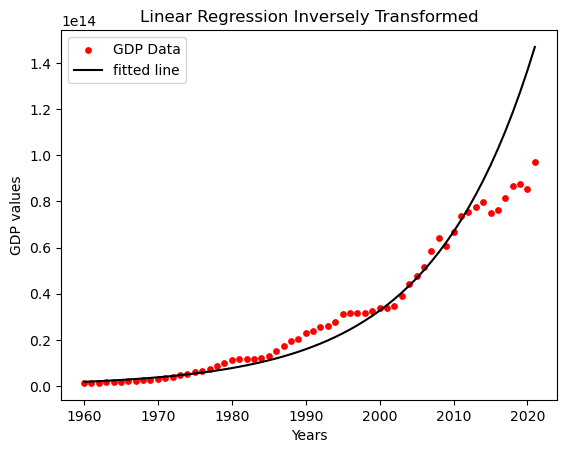

In [417]:
inverse_prediction = np.exp(prediction)

plt.scatter(time, gdp, label='GDP Data', s=15,color='red')

# Getting predictions from the fitted regression model
#The line represents the non linear model obtained by re-transforming predictions from linear regression model
plt.plot(time, inverse_prediction, 'black', label='fitted line')
plt.xlabel("Years")
plt.ylabel("GDP values")
plt.title("Linear Regression Inversely Transformed")
plt.legend()
plt.show()

**(e) What is the relationship between the slope of the regression and the long-term growth rate of the
world GDP? Compute the long-term growth rate of the world GDP.**

### Answer:

The connection between the slope of the regression line applied to logarithmically transformed GDP data and the long-term growth rate is nearly directly proportional. More precisely, the slope of the linear regression involving log-transformed GDP data serves as an approximation of the continuous, long-term growth rate for the global GDP.

$$
\text{slope} = \log(1+r)
$$



In [418]:
#r->continuous, long-term growth rate of the global GDP
r = np.exp(linear_regression.slope) - 1
print(f"The Long Term Growth rate of the world GDP is: {r:.4f} or {r*100:.2f}%")

The Long Term Growth rate of the world GDP is: 0.0742 or 7.42%


#### <u>Inference:-</u>
The positive value (7.42%) indicates overall positive economic growth in the long term. This means that, on average, the world GDP is expected to increase by approximately 7.42% each year, assuming the observed trend continues.

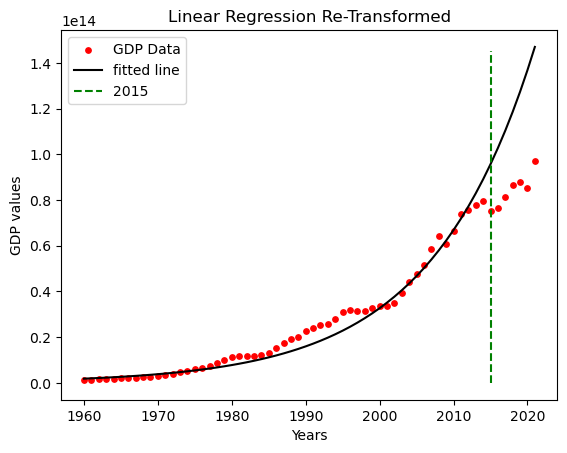

In [419]:
inverse_prediction = np.exp(prediction)
plt.scatter(time, gdp, label='GDP Data', s=15, color = 'red')

#Getting predictions from the fitted regression model

plt.plot(time, inverse_prediction, 'black', label='fitted line')
plt.vlines(2015, 0, 1.45e+14, color="green", label="2015", linestyles="dashed" )#reference line
plt.xlabel("Years")
plt.ylabel("GDP values")
plt.title("Linear Regression Re-Transformed")
plt.legend()
plt.show()

**(f) What do you observe since approximately 2015?**

### Answer:

#### <u>Observations:-</u>

+ Around the year 2015, we can observe a noticeable divergence between the fitted regression line and the actual data. Up until this point from 1960, the model adeptly reflects the underlying patterns in the data, leading to a high level of confidence in its suitability. However, beyond this timeframe, there is an observable discrepancy in the growth rates, resulting in a diminished quality of model fitting. This discrepancy can be attributed to a discretization error.

+ Furthermore, the diminished model accuracy post-2015 may indicate shifts in economic dynamics or unforeseen external factors influencing the global GDP trends. It underscores the importance of periodically reassessing models to ensure their continued relevance in capturing evolving pattern

+ This also means that due to discretization error, it indicates that the linear regression model, which is inherently focused on distinct points, may find it challenging to accurately capture the subtle and continuous changes in economic situations.

<div style="border-top: 2px solid #888; margin-top: 10px;"></div>

### Analysis 2

**2. In this question you will study the distribution of the slope and intercept parameters of a linear model. Consider the following model**
$$
y_i = ax_i + b + \epsilon_i \quad \text{where} \quad a = \frac{1}{2}, \ b = 2, \quad \epsilon_i \sim \mathcal{N}\left(0, \frac{1}{5}\right), \quad 1 \leq i \leq N
$$
**For the purpose of this exercise you will take N = 200 and generate the xis by,**
$$
\text{x} = \text{np.linspace}(−5, 5, 200)
$$
**(a) Generate 10000 sets of error vectors εi and use them to perform 10000 linear regression of the Ndimensional vectors (yi) against (xi), where yi 
is given by (1)**.

### Answer:

Slope = $( \beta_1 )$                               

Intercept = $( \beta_0 )$

The formula for calculating the slope $( \beta_1 )$ in linear regression is:

$$
\beta_1 = \frac{\sum_{i}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i}(x_i - \bar{x})^2}
$$

Where:
 - $( x_i )$ and $( y_i )$ are the individual data points.

 - $(\bar{x})$ and $(\bar{y})$ are the means of the (x) and (y) variables.


The formula for calculating the intercept $( \beta_0)$ in linear regression is:

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

Where:
 - $(\bar{y})$ is the mean of dependent variable(y)
 - $( \beta_1 )$ slope of regression line
 - $(\bar{x})$ is the mean of dependent variable(x)

In [420]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, norm
# Set a random seed for reproducibility
np.random.seed(42)

N = 200
x = np.linspace(-5, 5, N)

# Model parameters
a = 1/2
b = 2

slopes = []
intercepts = []

for _ in range(10000):
    #Generate error vector
    error = norm.rvs(0, 0.5, N)#N (0,1/5)

    #Calculate y
    y = a * x + b + error

    #Perform linear regression
    parameters = linregress(x, y)

    #Collect slopes and intercepts
    slopes.append(parameters.slope)
    intercepts.append(parameters.intercept)


**(b) Collect the slopes and the intercepts of these 10000 linear regressions and plot their histograms against their respective theoretical densities given in the lecture. What do you observe?**


### Answer:

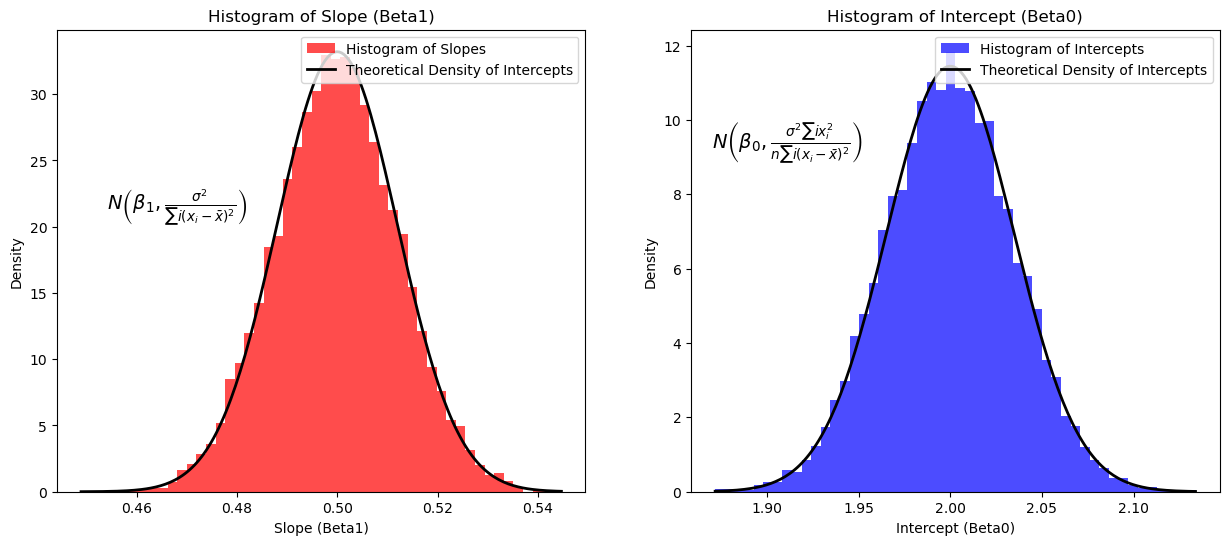

In [421]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Calculating PDFs
slope_theory_mean = a
slope_x_vals = np.linspace(min(slopes), max(slopes), N)
slope_theory_std = np.std(error) / np.sqrt(np.sum((x - np.mean(x))**2))
slope_prob_curve = norm.pdf(slope_x_vals, slope_theory_mean, slope_theory_std)

inter_theory_mean = b
inter_x_vals = np.linspace(min(intercepts), max(intercepts), N)
inter_theory_std = np.std(error) / np.sqrt(N)
inter_prob_curve = norm.pdf(inter_x_vals, inter_theory_mean, inter_theory_std)

#Creating histograms
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(slopes, bins=50, color='red', alpha=0.7, density=True, label='Histogram of Slopes')
#Plotting theoretical density curve for slopes
plt.plot(slope_x_vals, slope_prob_curve, 'k', linewidth=2, label='Theoretical Density of Intercepts')
plt.title('Histogram of Slope (Beta1)')
plt.text(0.454, 23, r'$N\left(\beta_1,\frac{\sigma^2}{\sum{i}(x_i-\bar{x})^2}\right)$', fontsize=14, color='black', ha='left', va='top')
plt.xlabel('Slope (Beta1)')
plt.ylabel('Density')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.hist(intercepts, bins=50, color='blue', alpha = 0.7, density = True, label='Histogram of Intercepts')
#Plotting theoretical density curve for intercepts
plt.plot(inter_x_vals, inter_prob_curve, 'k', linewidth = 2, label = 'Theoretical Density of Intercepts')
plt.title('Histogram of Intercept (Beta0)')
plt.text(1.87, 10, r'$N\left(\beta_0, \frac{\sigma^2 \sum{i} x_i^2}{n\sum{i} (x_i - \bar{x})^2}\right)$', fontsize=14, color='black', ha='left', va='top')
plt.xlabel('Intercept (Beta0)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

#### <u>Inference:-</u>
**Normal Distribution of Slope**
$N\left(\beta_1,\frac{\sigma^2}{\sum_i(x_i-\bar{x})^2}\right)$, where $\beta1$ is mean and $\frac{\sigma^2}{\sum_i(x_i-\bar{x})^2}$ is variance.

**Normal Distribution of Intercept**
$N\left(\beta_0, \frac{\sigma^2 \sum{i} x_i^2}{n\sum_i (x_i - \bar{x})^2}\right)$, where $\beta0$ is mean and $\frac{\sigma^2 \sum{i} x_i^2}{n\sum_i (x_i - \bar{x})^2}$ is variance.

The theoretical density for the slope $( \beta_1 )$ and intercept $( \beta_0 )$ in a simple linear regression model can be derived from statistical theory. In the context of a simple linear regression model $( y_i = \beta_0 + \beta_1 x_i + \epsilon_i )$, where $( \epsilon_i )$ are assumed to be normally distributed with mean 0 and a constant variance $( \sigma^2 )$, the probability density functions $( \beta_0 )$ and $( \beta_1 ) $ under normality assumptions are:

**Theoritical Density for $( \beta_1 )$:**
$$f(\beta_1) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{\beta_1^2}{2\sigma^2}} 
$$
PDF centered around 0 ($\beta1$) and has spread determined by variance $( \sigma^2 )$. ----> Linear regression model

**Theoritical Density for $( \beta_0 )$:**
$$ f(\beta_0) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{\beta_0^2}{2\sigma^2}}
$$
PDF centered around 0 ($\beta0$) and has spread determined by variance $( \sigma^2 )$. ----> Linear regression model

Therefore the density functions indicate that under the assumption of normal errors, the estimates of $( \beta_1 )$ and $( \beta_0 )$ are expected to follow normal distributions.

**What do you observe?**
#### <u>Observations:-</u>
+ We can observe from the above two plots that alignment between the histograms and theoretical density curves for both slope and intercept provides evidence that the parameter estimates derived from simulated linear regressions are unbiased and follow a normal distribution.
+ This aligns with the expectations from the Central Limit Theorem, which states that the distribution of the sample mean (or estimates, in this case) approaches a normal distribution as the sample size increases, regardless of the shape of the original population distribution.
+ This supports the validity of the assumed model.


**(c) For each of the 10000 regression, compute the test statistic for the slope and for the intercept (given
in the lecture) and plot their histograms against their theoretical density (also given in the lecture).
What do you observe?**

### Answer:

#### Compute and plot the t-statistics

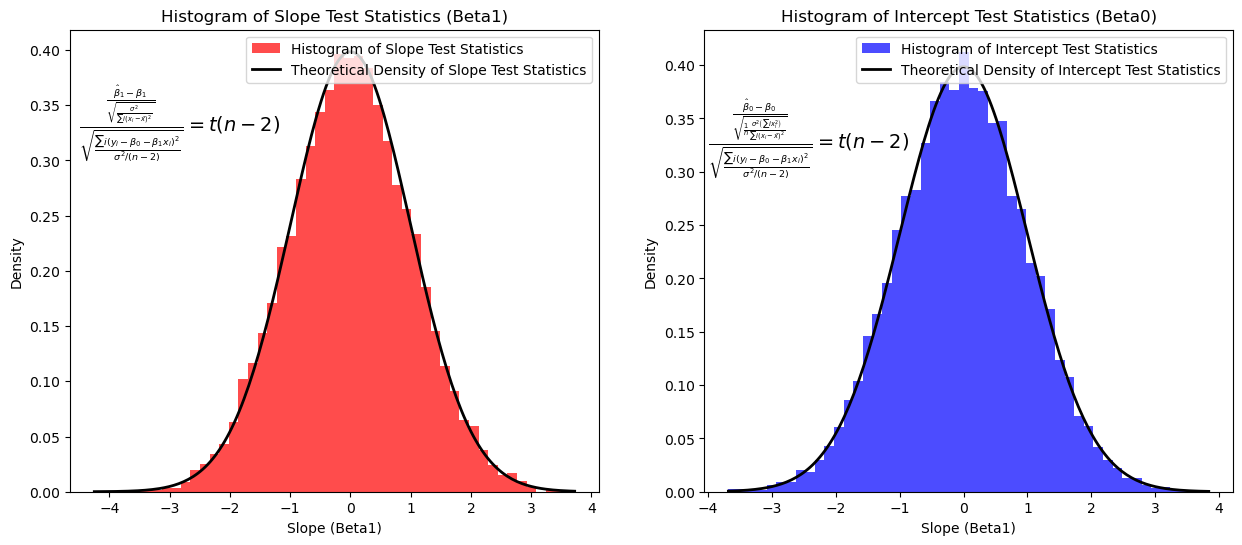

In [422]:
from scipy.stats import t

slopes = np.array(slopes)
intercepts = np.array(intercepts)

#Calculating test statistics
slopes_t = (slopes - a) / slope_theory_std
intercepts_t = (intercepts - b) / inter_theory_std

#Calculating PDFs
slope_x_vals = np.linspace(slopes_t.min(), slopes_t.max(), N)
slope_t_prob_curve = t.pdf(slope_x_vals, df=N-2)#t.pdf - Student t distribution

inter_x_vals = np.linspace(intercepts_t.min(), intercepts_t.max(), N)
inter_t_prob_curve = t.pdf(inter_x_vals, df=N-2)#t.pdf - Student t distribution


#Creating histograms
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(slopes_t, bins=50, color='red', alpha=0.7, density=True, label='Histogram of Slope Test Statistics')
#Plotting theoretical density curve for slopes
plt.plot(slope_x_vals, slope_t_prob_curve, 'k', linewidth=2, label='Theoretical Density of Slope Test Statistics')
plt.title('Histogram of Slope Test Statistics (Beta1)')
plt.text(-4.5, 0.37, r'$\frac{\frac{\hat{\beta}_1 - \beta_{1}}{\sqrt{\frac{\sigma^2}{\sum{i}(x_i - \bar{x})^2}}}}{\sqrt{\frac{\sum{i}(y_i - \beta_{0} - \beta_{1} x_i)^2}{\sigma^2 / (n-2)}}} = t(n-2)$', fontsize=14, color='black', ha='left', va='top')
plt.xlabel('Slope (Beta1)')
plt.ylabel('Density')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.hist(intercepts_t, bins=50, color='blue', alpha=0.7, density=True, label='Histogram of Intercept Test Statistics')
#Plotting theoretical density curve for intercepts
plt.plot(inter_x_vals, inter_t_prob_curve, 'k', linewidth=2, label='Theoretical Density of Intercept Test Statistics')
plt.title('Histogram of Intercept Test Statistics (Beta0)')
plt.text(-4, 0.37, r'$\frac{\frac{\hat{\beta}_0 - \beta_{0}}{\sqrt{\frac{1}{n} \frac{\sigma^2\left(\sum{i}x_i^2\right)}{\sum{i}(x_i - \bar{x})^2}}}}{\sqrt{\frac{\sum{i}(y_i - \beta_{0} - \beta_{1} x_i)^2}{\sigma^2 / (n-2)}}} = t(n-2)$', fontsize=14, color='black', ha='left', va='top')
plt.xlabel('Slope (Beta1)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()


#### <u>Inference:-</u> 
The t-test is applied here in order to assess the statistical significance of the estimated coefficients (slopes and intercepts) and to make inferences about the population parameters. 

**t-test testing Beta1**
$$
\frac{\frac{\hat{\beta}_1 - \beta_{1}}{\sqrt{\frac{\sigma^2}{\sum_{i}(x_i - \bar{x})^2}}}}{\sqrt{\frac{\sum_{i}(y_i - \beta_{0} - \beta_{1} x_i)^2}{\sigma^2 / (n-2)}}} = t(n-2)\quad \text {-----> Student's t- distribution}
$$

Use this to test H_0: $\beta_{1}$ = c, some constant, assuming $\beta_{0}$ is known.



**t-test testing Beta0**
$$
\frac{\frac{\hat{\beta}_0 - \beta_{0}}{\sqrt{\frac{1}{n} \frac{\sigma^2\left(\sum_{i}x_i^2\right)}{\sum_{i}(x_i - \bar{x})^2}}}}{\sqrt{\frac{\sum_{i}(y_i - \beta_{0} - \beta_{1} x_i)^2}{\sigma^2 / (n-2)}}} = t(n-2)\quad \text {-----> Student's t- distribution}
$$

Use this to test H_0: $\beta_{0}$ = c, some constant, assuming $\beta_{1}$ is known.


**What do you observe?**

#### <u>Observations:-</u>
+ We can observe from the histograms of t-statistics for both slopes and intercepts closely adhere to the theoretical t-distribution curves. 
+ This alignment indicates that the estimated slopes and intercepts exhibit statistical properties consistent with the assumptions of the linear regression model, particularly the normality of errors. 
+ The close correspondence between the empirical distributions and the theoretical expectations supports the validity of the t-test assumptions. 
+ We can conclude that the sampling distributions of the estimated slope and intercept demonstrate internal consistency and align closely with the theoretical distributions predicted by the t-test in the context of linear regression. 

**(d)Take the last of your regressions and perform the following two tests with α = 99% (you may use
either p-values or critical regions but make sure you think about whether this is a one-sided or
two-sided test).**

**First test: H0 : a =
1
2
(assuming b = 2)**

**Second test: H0 : b = 2 (assuming a =
1
2
)**

### Answer:

In [423]:
alpha = 0.99 # (99% confidence)
critical_value = t.ppf(1 + (alpha-1)/2, N - 2)

last_slope_t = abs(slopes_t[-1])
last_inter_t = abs(intercepts_t[-1])

#Taking p-values for two sided tests
slope_p_value = t.sf(last_slope_t, df=N-2) * 2
intercept_p_value = t.sf(last_inter_t, df=N-2) * 2

#Checking to see if hypotheses should be rejected
reject_slope_hypothesis = last_slope_t > critical_value
reject_inter_hypothesis = last_inter_t > critical_value

print(f"Alpha: {alpha}")
print(f"The p value for slopes is: {slope_p_value}")
print(f"The p value for intercepts is {intercept_p_value}")
print(f"Critical value: {critical_value}")

if reject_slope_hypothesis:
    print("We reject the null hypothesis for slopes.")
else:
    print("We do not reject the null hypothesis for slopes.")

if reject_inter_hypothesis:
    print("We reject the null hypothesis for intercepts.")
else:
    print("We do not reject the null hypothesis for intercepts.")

Alpha: 0.99
The p value for slopes is: 0.9184651792285743
The p value for intercepts is 0.1701029166320735
Critical value: 2.6008872779626224
We do not reject the null hypothesis for slopes.
We do not reject the null hypothesis for intercepts.


#### <u>Observations:-</u>

+ Here we use **two sided test** as it considers the possibility of a significant difference in either direction from the null hypothesis value. 
+ Both p-values are very high, indicating that there is not enough evidence to reject the null hypothesis at the 99% confidence level.
+ 
The test statistics for both slopes and intercepts are not extreme enough to fall into the critical region.

**(e) Change the model to**
$$
y_i = ax_i + b + \varepsilon_i \quad \text{where} \quad a = \frac{1}{2}, \quad b = 2, \quad \varepsilon_i \sim \text{Cauchy}(0, 1/5), \quad 1 \leq i \leq N.
$$

**Perform another 10000 regressions based on this model. Collect the slopes and intercepts of these
regressions as well as the associated statistics. Plot their histograms. What do you observe?**

### Answer:

In [424]:
from scipy.stats import linregress, kstest, norm, t, cauchy
# Set a random seed for reproducibility
np.random.seed(42)

N = 200
x = np.linspace(-5, 5, N)

#Model parameters
a = 1/2
b = 2

slopes = []
intercepts = []

for _ in range(10000):
    #Generate error vector
    error = cauchy.rvs(0, 0.2, N)#Cauchy(0,1/5)

    #Calculate y
    y = a * x + b + error

    #Perform linear regression
    parameters = linregress(x, y)

    #Collect slopes and intercepts
    slopes.append(parameters.slope)
    intercepts.append(parameters.intercept)
    

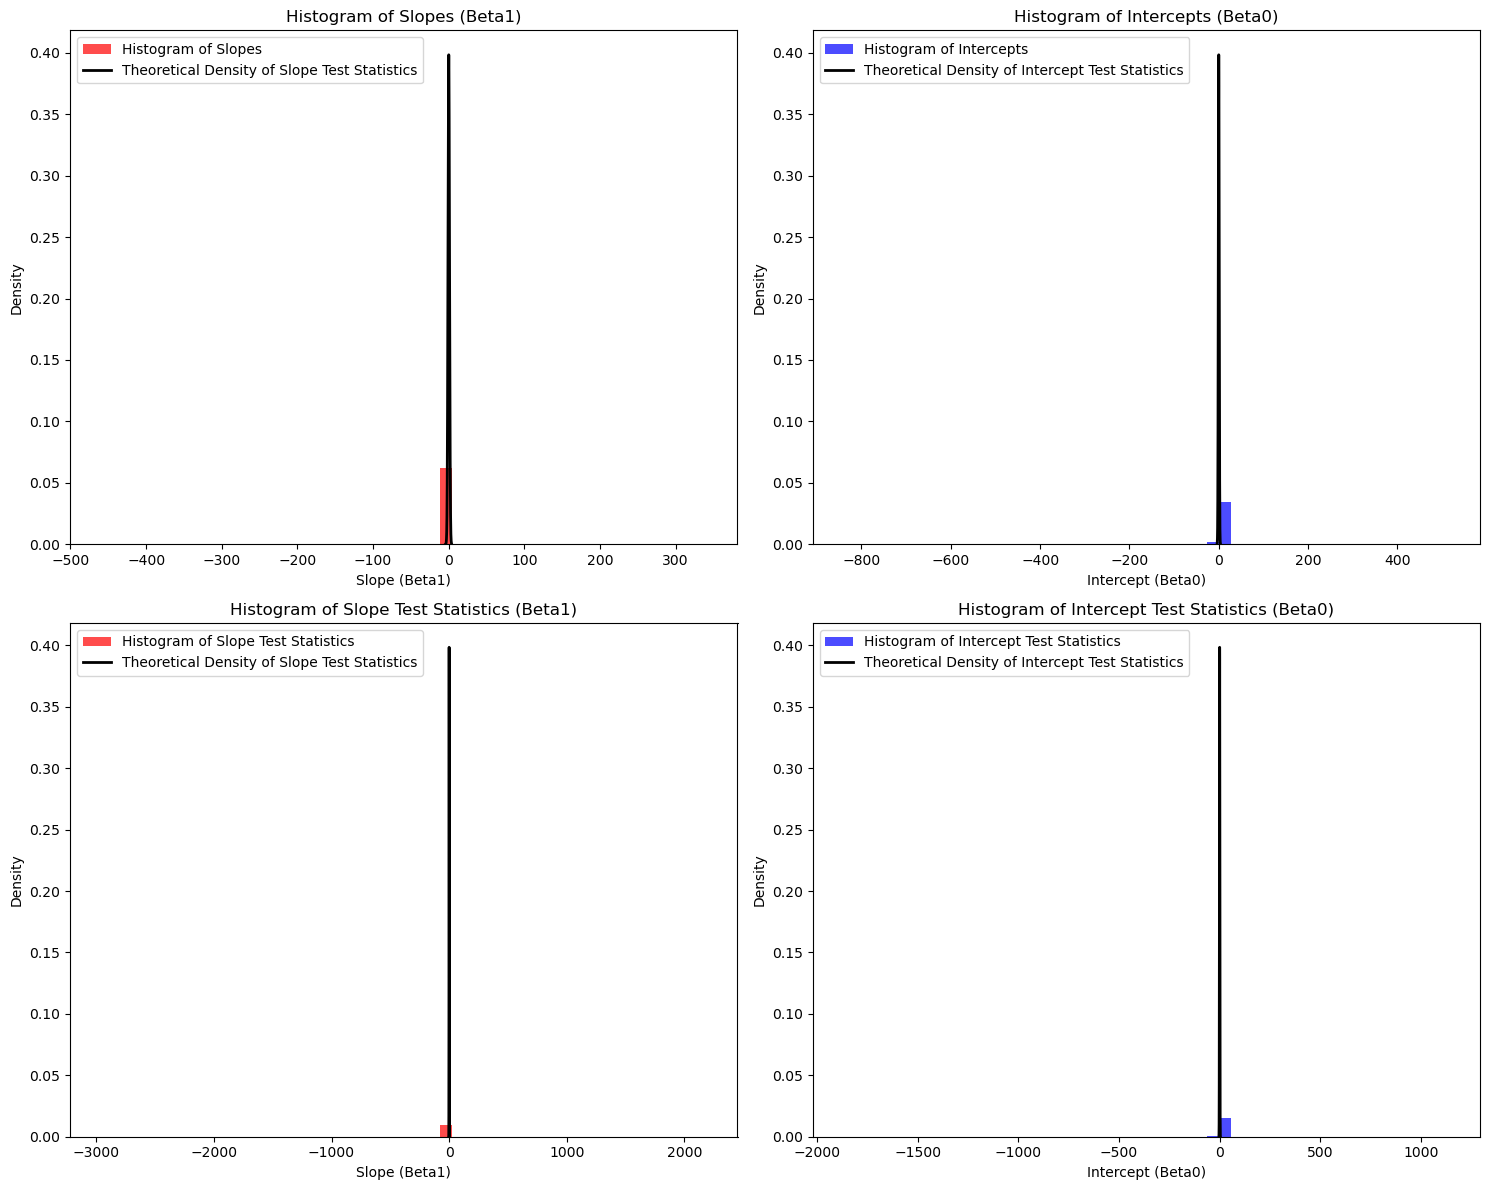

In [425]:
#Calculating test statistics
slope_theory_std = np.std(error) / np.sqrt(np.sum((x - np.mean(x))**2))
inter_theory_std = np.std(error) / np.sqrt(N)

slopes = np.array(slopes)
intercepts = np.array(intercepts)

slopes_t = (slopes - a) / slope_theory_std
intercepts_t = (intercepts - b) / inter_theory_std



#Creating histograms
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.hist(slopes, bins=50, color='red', alpha=0.7, density=True, label='Histogram of Slopes')
#Plotting theoretical density curve for slopes
plt.plot(slope_x_vals, slope_t_prob_curve, 'k', linewidth=2, label='Theoretical Density of Slope Test Statistics')
plt.title('Histogram of Slopes (Beta1)')
plt.xlabel('Slope (Beta1)')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(intercepts, bins=50, color='blue', alpha=0.7, density=True, label='Histogram of Intercepts')
#Plotting theoretical density curve for intercepts
plt.plot(inter_x_vals, inter_t_prob_curve, 'k', linewidth=2, label='Theoretical Density of Intercept Test Statistics')
plt.title('Histogram of Intercepts (Beta0)')
plt.xlabel('Intercept (Beta0)') 
plt.ylabel('Density')
plt.legend()



plt.subplot(2, 2, 3)
plt.hist(slopes_t, bins=50, color='red', alpha=0.7, density=True, label='Histogram of Slope Test Statistics')
# Plotting theoretical density curve for slopes
plt.plot(slope_x_vals, slope_t_prob_curve, 'k', linewidth=2, label='Theoretical Density of Slope Test Statistics')
plt.title('Histogram of Slope Test Statistics (Beta1)')
plt.xlabel('Slope (Beta1)')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(intercepts_t, bins=50, color='blue', alpha=0.7, density=True, label='Histogram of Intercept Test Statistics')
#Plotting theoretical density curve for intercepts
plt.plot(inter_x_vals, inter_t_prob_curve, 'k', linewidth=2, label='Theoretical Density of Intercept Test Statistics')
plt.title('Histogram of Intercept Test Statistics (Beta0)')
plt.xlabel('Intercept (Beta0)') 
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

#### <u>Observations:-</u>
+ We can observe wider and heavier-tailed histograms compared to the normal distribution case. This confirms **Cauchy distribution**.
+ 
These histograms obtained from the model featuring Cauchy-distributed error terms exhibit notable differences from those derived from the model with normally distributed error terms
+ Models with normally distributed errors yield stable estimates characterized by predictable variance, whereas models with Cauchy distribution errors produce more volatile estimates that are susceptible to significant impact from outliers.